# Description

The Titanic dataset is a well-known dataset that provides information about the passengers who were on board the Titanic ship when it sank on April 15, 1912.The data includes demographic information such as the passengers' names, ages, genders, ticket class, fare, and cabin numbers, as well as information about their families and whether they survived or not. 

# Problem Statement

The challenge is to use this information to build a predictive model that can accurately classify whether a passenger would have survived or not based on their characteristics.

# Importing necessary libraries

In [1]:
#importing required and necessary libraries
import numpy as np # used to perform mathematical operation on array
import pandas as pd # used for data manipulation
import matplotlib.pyplot as plt # used for data visualization
import seaborn as sns  # used for data visualization
import warnings # used to ignore warnings
warnings.filterwarnings('ignore')

C:\Users\neeli\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Reading the dataset

In [2]:
#Reading the train data and test data of titanic dataset
train_df = pd.read_csv("train.csv",nrows=200)
test_df = pd.read_csv("test.csv",nrows=200)

# Data Analysis

In [3]:
#to check whether that data is balanced or imbalanced
#count the number of instances of each class label
count=train_df['Survived'].value_counts()
#calculating the percentage of instances for each class label
percentage=count/train_df.shape[0]*100
#printing the class label counts and percentages
print("Class label counts: \n",count)
print("Class label percentages: \n",percentage)
#determining if the data is balanced or imbalanced
if (percentage[0] < 60 and percentage[1] < 60) or (percentage[0] > 40 and percentage[1] > 40):
    print("The data is balanced")
else:
    print("The data is imbalanced")


Class label counts: 
 0    131
1     69
Name: Survived, dtype: int64
Class label percentages: 
 0    65.5
1    34.5
Name: Survived, dtype: float64
The data is imbalanced


In [4]:
#checking the information about the dataframe
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  200 non-null    int64  
 1   Survived     200 non-null    int64  
 2   Pclass       200 non-null    int64  
 3   Name         200 non-null    object 
 4   Sex          200 non-null    object 
 5   Age          159 non-null    float64
 6   SibSp        200 non-null    int64  
 7   Parch        200 non-null    int64  
 8   Ticket       200 non-null    object 
 9   Fare         200 non-null    float64
 10  Cabin        40 non-null     object 
 11  Embarked     199 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.9+ KB


Inference: As we selected number of rows, nrows=200; The training-set has 200 entries and 12 features, which includes the target variable (survived).



In [5]:
#Returns description of the data in the DataFrame
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,200.000000,200.000000,200.000000,159.000000,200.000000,200.000000,200.000000
mean,100.500000,0.345000,2.420000,28.017799,0.680000,0.435000,27.518915
std,57.879185,0.476561,0.797987,15.295229,1.298472,0.871535,36.701640
min,1.000000,0.000000,1.000000,0.830000,0.000000,0.000000,0.000000
25%,50.750000,0.000000,2.000000,19.000000,0.000000,0.000000,8.050000
50%,100.500000,0.000000,3.000000,26.000000,0.000000,0.000000,14.772900
75%,150.250000,1.000000,3.000000,37.000000,1.000000,1.000000,30.227050
max,200.000000,1.000000,3.000000,71.000000,8.000000,5.000000,263.000000


Inference: We can see that 34% out of the training dataset survived the titanic. Also, we can infer that the passengers' ages ranges from 0.8 to 71. 

In [6]:
#Finding number of rows and columns of the dataframe
train_df.shape

(200, 12)

In [7]:
#Checking the first 5 rows of the train data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#Checking the last 5 rows of the train data
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C
196,197,0,3,"Mernagh, Mr. Robert",male,NaN,0,0,368703,7.7500,NaN,Q
197,198,0,3,"Olsen, Mr. Karl Siegwart Andreas",male,42.0,0,1,4579,8.4042,NaN,S
198,199,1,3,"Madigan, Miss. Margaret ""Maggie""",female,NaN,0,0,370370,7.7500,NaN,Q
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0000,NaN,S


Inference: From the above tables, we see that; we need to convert categorical features into numeric for the processing. We can aslo note that there are some features which contains missing values (NaN) that we should deal with them

In [9]:
#Checking the first 5 rows of the test data
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
#Finding number of rows and columns of the dataframe
test_df.shape

(200, 11)

In [11]:
#Returns description of the data in the DataFrame
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,200.000000,200.000000,160.000000,200.000000,200.000000,199.000000
mean,991.500000,2.280000,30.537500,0.470000,0.405000,36.153309
std,57.879185,0.857483,14.161751,0.950588,0.930216,57.080172
min,892.000000,1.000000,1.000000,0.000000,0.000000,3.170800
25%,941.750000,1.000000,21.750000,0.000000,0.000000,7.895800
50%,991.500000,3.000000,27.000000,0.000000,0.000000,14.500000
75%,1041.250000,3.000000,39.250000,1.000000,0.000000,30.943750
max,1091.000000,3.000000,76.000000,8.000000,6.000000,263.000000


# Data Pre-processing

In [12]:
#Checking for the missing values
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,160,80.0
Age,41,20.5
Embarked,1,0.5
PassengerId,0,0.0
Survived,0,0.0


Inference: From the above result, we infer that there are missing values present in 3 features (Cabin, Age, Embarked). Missing values in Embarked and Age features can be filled but Cabin feature contains 80% of the missing values, which we can drop it.  

In [13]:
#checking for the columns in train data
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Data Visualization

<AxesSubplot: xlabel='Pclass', ylabel='Survived'>

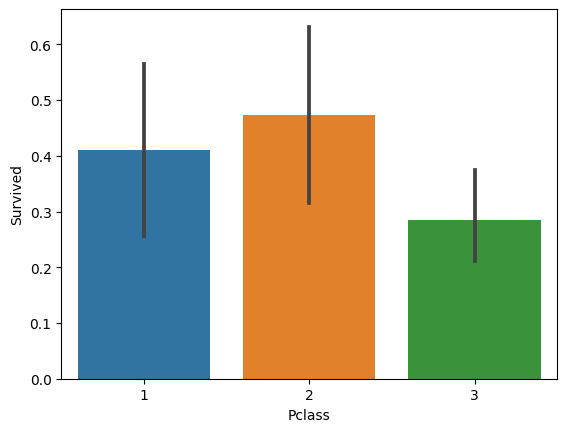

In [14]:
#Correlation between Pclass and Survival
sns.barplot(x='Pclass', y='Survived', data=train_df)

Inference: We can see that Pclass is contributing to a persons chance of survival, especially if this person is in class 1 or 2

<AxesSubplot: xlabel='Sex', ylabel='count'>

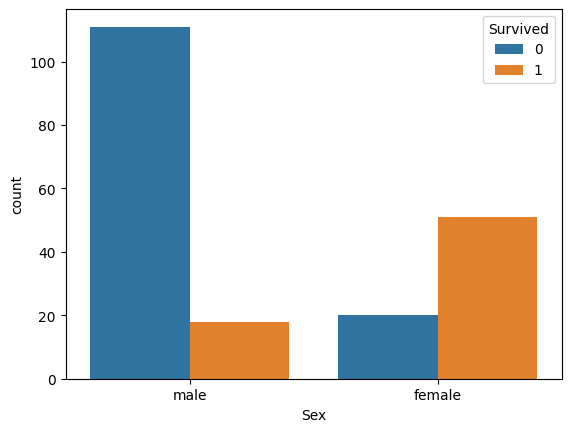

In [15]:
sns.countplot(x="Sex",hue="Survived",data=train_df)


Inference: We can say that tha survival of female is more when compared to male

In [16]:
#Calculating number of survived and not survived from the train data
#count the number of survivors
survived=train_df[train_df['Survived']==1].Survived.count()
#count the number od non-survivals
not_survived=train_df[train_df['Survived']==0].Survived.count()
#Results
print("Number of survivors: ",survived)
print("Number of non-survivors: ",not_survived)

Number of survivors:  69
Number of non-survivors:  131


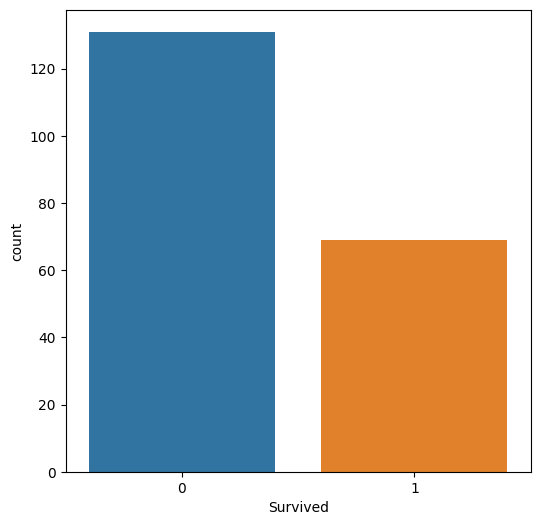

In [17]:
#to show frequency of values in Survived feature using countplot
plt.figure(figsize=(6,6))
sns.countplot(x='Survived',data=train_df)
plt.show()

Inference: We can see the frequency of values in survived column as survived and not survived in which 0 represents the passengers who are not survived and 1 represents who are survived.

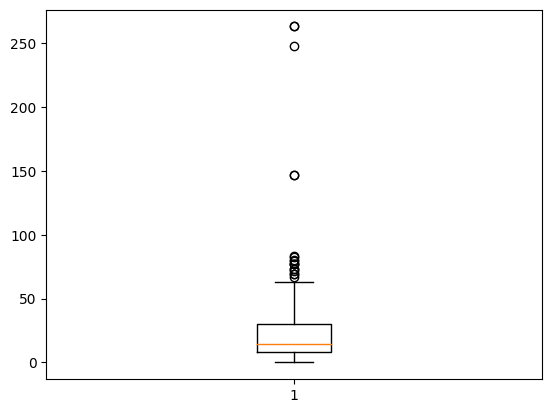

In [18]:
#creating a boxplot for the Fare column
plt.boxplot(train_df['Fare'])
plt.show()

Inference: We can see that there are outliers present in Fare column

In [19]:
#dropping the PassenegrId, since it does not contribute to a persons survival probability
train_df = train_df.drop(['PassengerId'], axis=1)

Note: Do not drop the PassengerId feature from thet test data, as it is useful for the submission

In [20]:
#dropping cabin column form both train and test data
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [21]:
#finding the mean of 'Age' column and filling the null values with mean value obtained
train_df['Age'].fillna(train_df['Age'].median(),inplace=True)
train_df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    1
dtype: int64

In [22]:
#finding the mean of 'Age' column and filling the null values with mean value obtained
test_df['Age'].fillna(test_df['Age'].median(),inplace=True)
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [23]:
#finding the description from 'Embarked' column
train_df['Embarked'].describe()

count     199
unique      3
top         S
freq      143
Name: Embarked, dtype: object

In [24]:
#finding the common value from the 'Embarked' column and filling null values with it
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [25]:
train_df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

Inference: We have filled all the missing values present in the features

# Feature Engineering

In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  200 non-null    int64  
 1   Pclass    200 non-null    int64  
 2   Name      200 non-null    object 
 3   Sex       200 non-null    object 
 4   Age       200 non-null    float64
 5   SibSp     200 non-null    int64  
 6   Parch     200 non-null    int64  
 7   Ticket    200 non-null    object 
 8   Fare      200 non-null    float64
 9   Embarked  200 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 15.8+ KB


In [27]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  200 non-null    int64  
 1   Pclass       200 non-null    int64  
 2   Name         200 non-null    object 
 3   Sex          200 non-null    object 
 4   Age          200 non-null    float64
 5   SibSp        200 non-null    int64  
 6   Parch        200 non-null    int64  
 7   Ticket       200 non-null    object 
 8   Fare         199 non-null    float64
 9   Embarked     200 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 15.8+ KB


Inference: We can note that 'Fare' is a float and also there are 4 categorical features that are to be converted into numerical features

In [85]:
#Removing the outliers from Fare column
Q1=train_df['Fare'].quantile(0.25)
Q3=train_df['Fare'].quantile(0.75)
IQR=Q3-Q1
train_df=train_df[~((train_df['Fare'] < (Q1-1.5*IQR)) | (train_df['Fare'] > (Q3 + 1.5*IQR)))]
train_df.to_csv("Cleaned_data.csv",index=False)

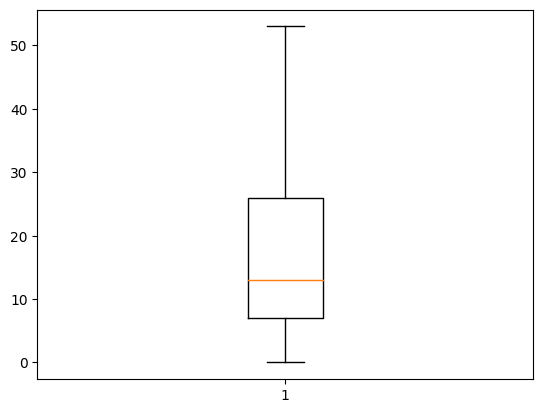

In [86]:
#creating a boxplot for the Fare column
train_df = pd.read_csv("Cleaned_data.csv")
plt.boxplot(train_df['Fare'])
plt.show()

In [87]:
#Removing the outliers from Fare column
Q1=test_df['Fare'].quantile(0.25)
Q3=test_df['Fare'].quantile(0.75)
IQR=Q3-Q1
test_df=test_df[~((test_df['Fare'] < (Q1-1.5*IQR)) | (test_df['Fare'] > (Q3 + 1.5*IQR)))]
test_df.to_csv("Cleaned_data_test.csv",index=False)

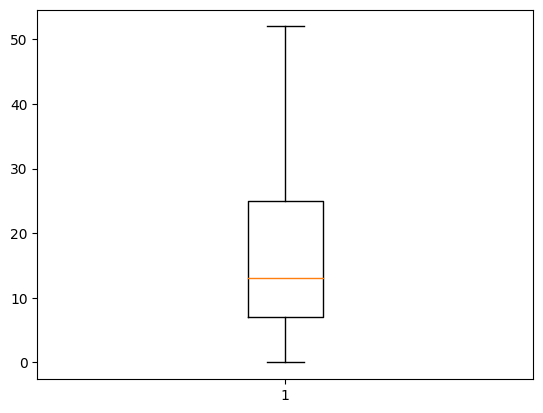

In [88]:
#creating a boxplot for the Fare column
test_df = pd.read_csv("Cleaned_data_test.csv")
plt.boxplot(test_df['Fare'])
plt.show()

Inference: Removed the outliers from the fare column from both train and test data

In [32]:
#filling the null values in Fare column in test dataset with 0 
test_df['Fare']=test_df['Fare'].fillna(0)

In [33]:
#converting the float to int data type of Fare column in both train_df and test_df
train_df['Fare']=train_df['Fare'].astype(int)
test_df['Fare']=test_df['Fare'].astype(int)

In [34]:
#converting the float to int data type of Fare column in both train_df and test_df
train_df['Age']=train_df['Age'].astype(int)
test_df['Age']=test_df['Age'].astype(int)

In [35]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  182 non-null    int64 
 1   Pclass    182 non-null    int64 
 2   Name      182 non-null    object
 3   Sex       182 non-null    object
 4   Age       182 non-null    int32 
 5   SibSp     182 non-null    int64 
 6   Parch     182 non-null    int64 
 7   Ticket    182 non-null    object
 8   Fare      182 non-null    int32 
 9   Embarked  182 non-null    object
dtypes: int32(2), int64(4), object(4)
memory usage: 12.9+ KB


In [36]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  178 non-null    int64 
 1   Pclass       178 non-null    int64 
 2   Name         178 non-null    object
 3   Sex          178 non-null    object
 4   Age          178 non-null    int32 
 5   SibSp        178 non-null    int64 
 6   Parch        178 non-null    int64 
 7   Ticket       178 non-null    object
 8   Fare         178 non-null    int32 
 9   Embarked     178 non-null    object
dtypes: int32(2), int64(4), object(4)
memory usage: 12.6+ KB


In [37]:
train_df.isnull().sum().sum()

0

In [38]:
test_df.isnull().sum().sum()

0

In [39]:
train_df.shape

(182, 10)

In [40]:
test_df.shape

(178, 10)

In [41]:
#dropping the name column
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [42]:
#using one-hot encoding
#Getting dummies for 'Sex' column
train_df = pd.get_dummies(train_df, columns=['Sex'])

In [43]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male
0,0,3,22,1,0,A/5 21171,7,S,0,1
1,1,3,26,0,0,STON/O2. 3101282,7,S,1,0
2,1,1,35,1,0,113803,53,S,1,0
3,0,3,35,0,0,373450,8,S,0,1
4,0,3,26,0,0,330877,8,Q,0,1


In [44]:
train_df = train_df.drop(['Sex_male'],axis=1)

In [45]:
#Getting dummies for 'Sex' column for test dataset
test_df = pd.get_dummies(test_df, columns=['Sex'])
test_df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male
0,892,3,34,0,0,330911,7,Q,0,1
1,893,3,47,1,0,363272,7,S,1,0
2,894,2,62,0,0,240276,9,Q,0,1
3,895,3,27,0,0,315154,8,S,0,1
4,896,3,22,1,1,3101298,12,S,1,0


In [46]:
test_df = test_df.drop(['Sex_male'],axis=1)

In [47]:
#dropping the 'Ticket' column from both train and test data
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

In [48]:
#label encoding
#Converting categorical to numerical for Embarked feature
values = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(values)

In [49]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female
0,0,3,22,1,0,7,0,0
1,1,3,26,0,0,7,0,1
2,1,1,35,1,0,53,0,1
3,0,3,35,0,0,8,0,0
4,0,3,26,0,0,8,2,0


In [50]:
test_df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female
0,892,3,34,0,0,7,2,0
1,893,3,47,1,0,7,0,1
2,894,2,62,0,0,9,2,0
3,895,3,27,0,0,8,0,0
4,896,3,22,1,1,12,0,1


# Input-Output split

In [51]:
train_df.shape

(182, 8)

In [52]:
test_df.shape

(178, 8)

In [53]:
#dividing input and output columns
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
test    = test_df["PassengerId"]
X_test  = test_df.drop("PassengerId", axis=1)

# Train-Test Split

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_train,Y_train,test_size=0.2)

The train_test split used to divide the data into training and testing set. Training set used to build the model and testing set used to make predictions

# Using Gaussian Naive Bayes Classifier

# Model Building

In [55]:
#building the model using Gaussian naive bayes
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  

GaussianNB()

Inference: model is trained using Gaussian Naive Bayes algorithm

# Model Evaluation

In [56]:
#Evaluating the performance of the model
from sklearn.metrics import accuracy_score
y_train_pred=gaussian.predict(X_train)
accuracy_gnb = accuracy_score(Y_train,y_train_pred)
print("Accuracy of the model:",accuracy_gnb)

Accuracy of the model: 0.7862068965517242


In [57]:
#Evaluating the performance of the model
from sklearn.metrics import accuracy_score
y_pred=gaussian.predict(X_test)
accuracy_gnb = accuracy_score(Y_test,y_pred)
print("Accuracy of the model:",accuracy_gnb)

Accuracy of the model: 0.8108108108108109


Inference: From the above result, we obtained the accuracy of traing data and testing data.
For the classification model, It is better to compare with other evaluation metrics too

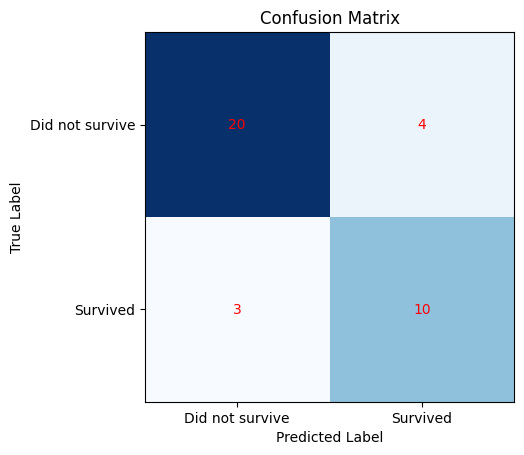

In [58]:
#Creating a Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Blues')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Did not survive', 'Survived'])
ax.set_yticks([0, 1])
ax.set_yticklabels(['Did not survive', 'Survived'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="red")
plt.show() 


Inference: from the above matrix, we got 23 of the people who did not survive right, and 10 of the people who did survive right. But also that we killed 3 of the passengers in our model, and brought 4 of them back to life!

In [59]:
#Creating a classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        24
           1       0.71      0.77      0.74        13

    accuracy                           0.81        37
   macro avg       0.79      0.80      0.80        37
weighted avg       0.82      0.81      0.81        37



In [60]:
#Calculating the precision,F1 score, recall
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
# Evaluate the model
accuracy_gnb = accuracy_score(Y_test, y_pred)
precision_gnb = precision_score(Y_test, y_pred)
recall_gnb = recall_score(Y_test, y_pred)
f1_gnb = f1_score(Y_test, y_pred)

print("Accuracy:", accuracy_gnb)
print("Precision:", precision_gnb)
print("Recall:", recall_gnb)
print("F1 Score:", f1_gnb)

Accuracy: 0.8108108108108109
Precision: 0.7142857142857143
Recall: 0.7692307692307693
F1 Score: 0.7407407407407408


In [61]:
#Computing the ROC-AUC score
from sklearn.metrics import roc_auc_score
roc_auc_gnb=roc_auc_score(Y_test,y_pred)
print("ROC-AUC score:",roc_auc_gnb)

ROC-AUC score: 0.8012820512820513


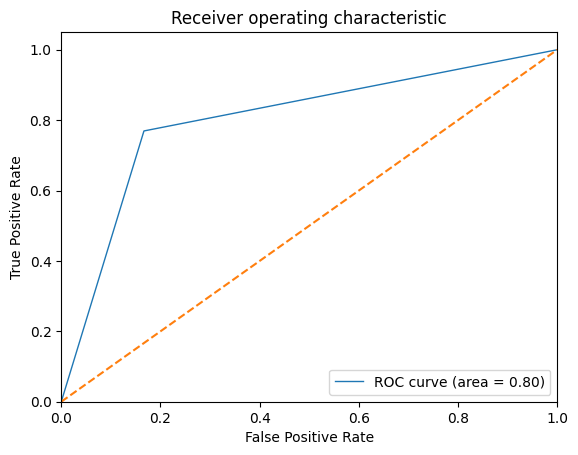

In [62]:
#plotting the AUC-ROC curve
from sklearn.metrics import roc_curve,auc
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 

Inference: we plotted True positive rate vs false positive rate. We have obtained area which is close to 1 and tells that our classifier performs well 

# Using Bernoulli Naive Bayes Classifier

# Model Building

In [63]:
#building the model using Bernoulli naive bayes
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB() 
model.fit(X_train, Y_train)  

BernoulliNB()

# Model Evaluation

In [64]:
#Evaluating the performance of the model
from sklearn.metrics import accuracy_score
y_train_pred1=model.predict(X_train)
accuracy_bn = accuracy_score(Y_train,y_train_pred1)
print("Accuracy of the model:",accuracy_bn)

Accuracy of the model: 0.7862068965517242


In [65]:
#Evaluating the performance of the model
from sklearn.metrics import accuracy_score
y_pred1=model.predict(X_test)
accuracy_bn = accuracy_score(Y_test,y_pred1)
print("Accuracy of the model:",accuracy_bn)

Accuracy of the model: 0.8378378378378378


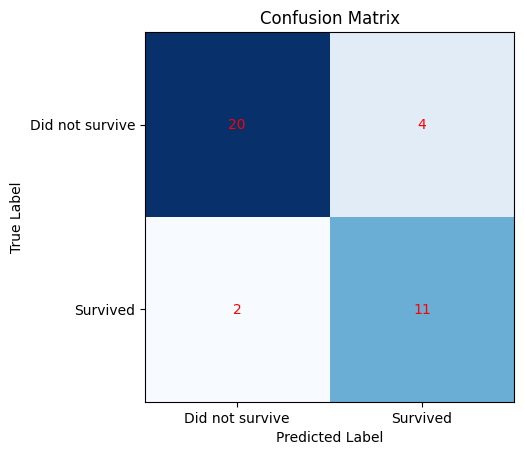

In [66]:
#Creating a Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred1)
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Blues')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Did not survive', 'Survived'])
ax.set_yticks([0, 1])
ax.set_yticklabels(['Did not survive', 'Survived'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="red")
plt.show() 

In [67]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        24
           1       0.73      0.85      0.79        13

    accuracy                           0.84        37
   macro avg       0.82      0.84      0.83        37
weighted avg       0.85      0.84      0.84        37



In [68]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
# Evaluate the model
accuracy_bn = accuracy_score(Y_test, y_pred1)
precision_bn = precision_score(Y_test, y_pred1)
recall_bn = recall_score(Y_test, y_pred1)
f1_bn = f1_score(Y_test, y_pred1)

print("Accuracy:", accuracy_bn)
print("Precision:", precision_bn)
print("Recall:", recall_bn)
print("F1 Score:", f1_bn)

Accuracy: 0.8378378378378378
Precision: 0.7333333333333333
Recall: 0.8461538461538461
F1 Score: 0.7857142857142856


In [69]:
#Computing the ROC-AUC score
from sklearn.metrics import roc_auc_score
roc_auc_bn=roc_auc_score(Y_test,y_pred1)
print("ROC-AUC score:",roc_auc_bn)

ROC-AUC score: 0.8397435897435898


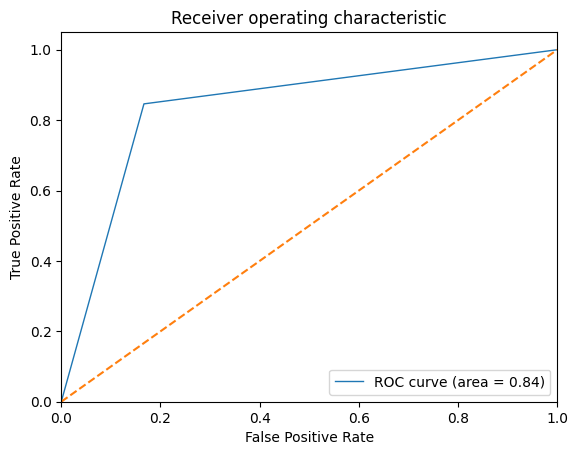

In [70]:
#plotting the AUC-ROC curve
from sklearn.metrics import roc_curve,auc
fpr, tpr, thresholds = roc_curve(Y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Comparing both models

In [71]:
# Compare the scores
print("Bernoulli Naive Bayes:")
print("Accuracy:", accuracy_bn)
print("Precision:", precision_bn)
print("Recall:", recall_bn)
print("F1 Score:", f1_bn)
print("\n")
print("******************************")
print("\n")
print("Gaussian Naive Bayes:")
print("Accuracy:", accuracy_gnb)
print("Precision:", precision_gnb)
print("Recall:", recall_gnb)
print("F1 Score:", f1_gnb)

Bernoulli Naive Bayes:
Accuracy: 0.8378378378378378
Precision: 0.7333333333333333
Recall: 0.8461538461538461
F1 Score: 0.7857142857142856


******************************


Gaussian Naive Bayes:
Accuracy: 0.8108108108108109
Precision: 0.7142857142857143
Recall: 0.7692307692307693
F1 Score: 0.7407407407407408


Inference: From the above result, we can infer that bernoulli model performs well when compared to gaussian naive bayes model

# Submission

The values predicted are within a numerical array, so we need to put them into a data series (one column of a data frame) before attaching it to the PassengerId column:

In [72]:
predictions = pd.Series(data=y_pred, name='Survived')
type(predictions)

pandas.core.series.Series

In [73]:
predictions.head()

0    0
1    0
2    0
3    0
4    1
Name: Survived, dtype: int64

In [74]:
sub = pd.concat([test, predictions], axis=1)

In [75]:
sub.head()

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0


In [76]:
# Specify index=False so we don't get the index column when exporting to excel
submission3 = sub.to_csv('submission3.csv', index=False)

Conclusion: * Built the model using Gaussian Naive Bayes classifier algorithm after all the pre-processing steps were done.
            * Considered F1-score as the best evaluation metric since it is a classification model and obtained the best score.
            * Predictions were made using the test data.
            * Obtained the important features which may be helpful to obtain much better model
            * Submitted the predictions to CSV file